# Kyphosis Disease Prediction Using Neural Network and Xg boost model with gridsearch CV

In [1]:
#pip install torch

In [2]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix

In [3]:
#load the Dataset
abc = pd.read_csv('kyphosis.csv')
abc

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [4]:
abc.head(15)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [5]:
abc.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


<Axes: >

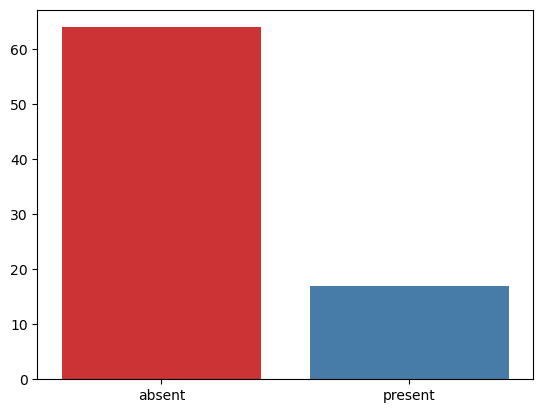

In [6]:
visual = abc['Kyphosis'].value_counts()
sns.barplot(x=visual.index, y=visual.values , palette = 'Set1')

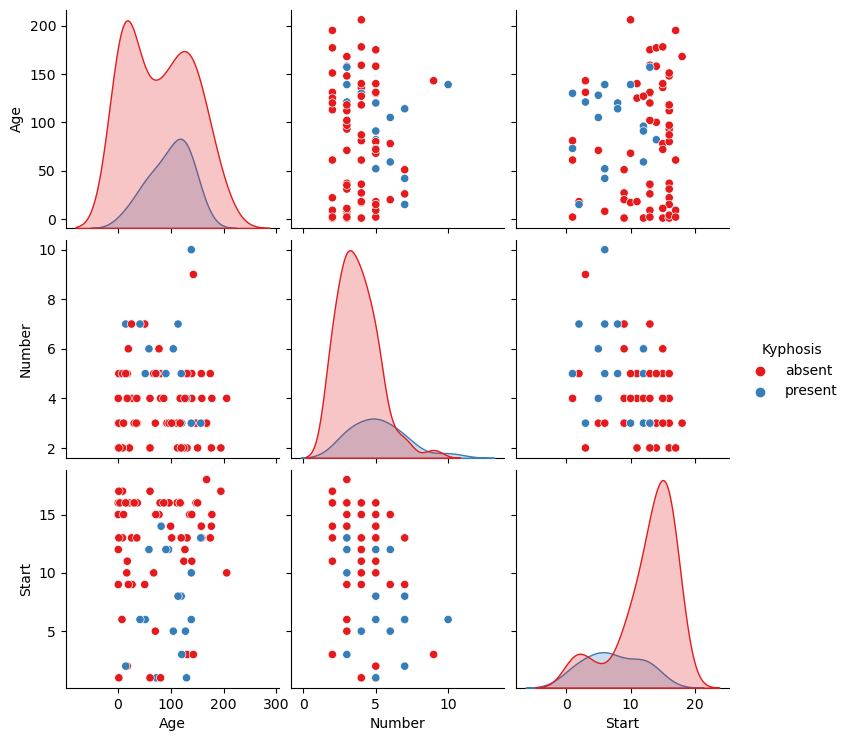

In [7]:
sns.pairplot(abc,hue = 'Kyphosis', palette = 'Set1')

In [8]:
X = abc.drop('Kyphosis', axis = 1)
Y = abc['Kyphosis']

In [9]:
sys.getsizeof(X)


2088

In [10]:
sys.getsizeof(Y)

5264

# it's oversampling because the size of the majority class (y) is smaller than the minority class (x), leading to the need to increase the instances of the minority class to balance the dataset . we will use SMOTE

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'auto')
x_resampled , y_resampled = smote.fit_resample(X,Y)

In [12]:
Balanced_kyphosis = pd.concat([x_resampled, y_resampled],axis = 1)
Balanced_kyphosis.to_csv('Balanced_kyphosis_data.csv')

In [13]:
abc1 = pd.read_csv("Balanced_kyphosis_data.csv")

In [14]:
abc1.head(10)

,Unnamed: 0,Age,Number,Start,Kyphosis
0,0,71,3,5,absent
1,1,158,3,14,absent
2,2,128,4,5,present
3,3,2,5,1,absent
4,4,1,4,15,absent
5,5,1,2,16,absent
6,6,61,2,17,absent
7,7,37,3,16,absent
8,8,113,2,16,absent
9,9,59,6,12,present


In [15]:
abc1.describe()

,Unnamed: 0,Age,Number,Start
count,128.000000,128.000000,128.000000,128.000000
mean,63.500000,86.101562,4.320312,9.734375
std,37.094474,50.600619,1.489774,5.003124
min,0.000000,1.000000,2.000000,1.000000
25%,31.750000,43.750000,3.000000,5.000000
50%,63.500000,93.500000,4.000000,10.500000
75%,95.250000,121.750000,5.000000,14.000000
max,127.000000,206.000000,10.000000,18.000000


In [16]:
x = abc1.drop('Kyphosis',axis =1)
y = abc1.Kyphosis

In [17]:
label_encoder = LabelEncoder()
y_encoded =label_encoder.fit_transform(y)

In [18]:
y_encoded

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Split the data into training and testing sets


NOTE : using "stratify = y" can help ensure that each class is represented proportionally in bith the training and testinng sets. 
    This is important to prevent the modl from being biased toward the majority class.

In [19]:
xtrain,xtest,ytrain, ytest= train_test_split(x,y_encoded,test_size = 0.2,stratify = y_encoded, random_state = 42)

# Standardize the Features

In [20]:
scale = StandardScaler()
x_train = scale.fit_transform(xtrain)
x_test = scale.fit_transform(xtest)

# Define and Build a Simple Neural Network model for Kyphosis Disease Detection

In [21]:
class NNKyphosisClassifier(nn.Module):
    def __init__(self):
        super(NNKyphosisClassifier, self).__init__()
        self.layer1 = nn.Linear(4, 64)
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, X):
        X = self.layer1(X)
        X = self.activation1(X)
        X = self.layer2(X)
        X = self.sigmoid(X)
        return X

# Create the Neaural Network Model

In [22]:
import torch.nn as nn
neural_network_model = NNKyphosisClassifier()

# Define the loss Function and optimizer for model Training

In [23]:
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(ytrain).view(-1,1)

In [24]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(neural_network_model.parameters(), lr=0.001)


# Training NN models for kyphosis disease detection

In [25]:
for epoch in range(100):
    optimizer.zero_grad()
    outputs= neural_network_model(x_train)
    loss=criterion(outputs, y_train)
    loss.backward() 
    optimizer.step()

# convert test data to pytorch tensor

In [26]:
X_test = torch.FloatTensor(x_test)

# Make prediction using the trained model

In [27]:
with torch.no_grad():
    neural_network_model.eval()
    predictions = neural_network_model(X_test)


#Convert the predictions to a numpy array

In [28]:
predicted_label = (predictions>0.5).numpy().flatten()  #its binary classification (0 or 1)

In [29]:
actual_labels = ytest == 1  #assuming 1 represent "present", adjust as needed

# calculate the Model evaluation

In [30]:
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report


In [31]:
cm        = confusion_matrix(actual_labels, predicted_label)
accuracy  = accuracy_score(actual_labels, predicted_label)
precision = precision_score(actual_labels, predicted_label)
recall    = recall_score(actual_labels, predicted_label) 
f1        = f1_score(actual_labels, predicted_label)
cr        = classification_report(actual_labels, predicted_label)                    

In [32]:
print ('(********************True for "1" and false for "0"*********************)')
for actual, predicted in zip(actual_labels, predicted_label):
 print(f'Actual: {actual}, Predicted: {predicted}')

(********************True for "1" and false for "0"*********************)
Actual: True, Predicted: True
Actual: True, Predicted: True
Actual: False, Predicted: False
Actual: False, Predicted: False
Actual: False, Predicted: False
Actual: False, Predicted: False
Actual: True, Predicted: True
Actual: True, Predicted: False
Actual: True, Predicted: True
Actual: False, Predicted: False
Actual: False, Predicted: False
Actual: True, Predicted: False
Actual: True, Predicted: True
Actual: True, Predicted: False
Actual: False, Predicted: False
Actual: True, Predicted: False
Actual: False, Predicted: False
Actual: False, Predicted: False
Actual: True, Predicted: True
Actual: False, Predicted: False
Actual: False, Predicted: False
Actual: False, Predicted: False
Actual: True, Predicted: True
Actual: True, Predicted: True
Actual: False, Predicted: False
Actual: True, Predicted: True


# Display over evaluation matrix

In [33]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}') 
print('Confusion Matrix: \n', cm)
print('Classification report: \n', cr)

Accuracy: 0.85
Precision: 1.00
Recall: 0.69
F1-Score: 0.82
Confusion Matrix: 
 [[13  0]
 [ 4  9]]
Classification report: 
               precision    recall  f1-score   support

       False       0.76      1.00      0.87        13
        True       1.00      0.69      0.82        13

    accuracy                           0.85        26
   macro avg       0.88      0.85      0.84        26
weighted avg       0.88      0.85      0.84        26



# Define and build the Gradient Boosting(XGBoost)model for KYphosis disease prediction

In [34]:
import xgboost as xgb
#Create and train the XGBoost model XGB model
xgb.XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

optimizing the parameter of your XGBOost model for kyphosis dataset can be done using hyperparameter tuning teedchniques . 
you can use grid search or randomized search to find the best combination of hyperparameter . here we are going to user "gridsearch"

In [35]:
#Define a grid of hyperparameters to search (Hyperparameter tunning)
param_grid={
    'n_estimators': [100, 200, 300] ,
    'max_depth': [3, 4, 51] ,
    'learning_rate': [10.01, 0.1, 0.21],
    'min_child_weight': [11, 2, 31] 
}
#Add more hyperparameters to search and their respective values

#perform gird search with cross validation

In [36]:
import xgboost as xgb
XGB_model = xgb.XGBClassifier()

In [37]:
grid_search = GridSearchCV(estimator = XGB_model,param_grid = param_grid , scoring = 'accuracy',cv = 5)

In [38]:
#fit the model to find the best hyperparamter
grid_search.fit(x_train, ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [10.01, 0.1, 0.21],
                         'max_depth': [3, 4, 51],
                         'min_child_weight': [11, 2, 31],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [39]:
grid_search

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [10.01, 0.1, 0.21],
                         'max_depth': [3, 4, 51],
                         'min_child_weight': [11, 2, 31],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [40]:
#get the best hyperparameter and model
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_
print(f'Best XGBoostModel Parameter: {best_params}')

Best XGBoostModel Parameter: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 300}


# Make Prediction for XGboost model

In [41]:
xgb_prediction1 = best_xgb_model.predict(x_test)

In [42]:
for actual,predicted in zip(ytest,xgb_prediction1):
    print(f'Actual :{actual},Predicted :{predicted}')

Actual :1,Predicted :1
Actual :1,Predicted :1
Actual :0,Predicted :1
Actual :0,Predicted :0
Actual :0,Predicted :0
Actual :0,Predicted :0
Actual :1,Predicted :1
Actual :1,Predicted :1
Actual :1,Predicted :1
Actual :0,Predicted :0
Actual :0,Predicted :0
Actual :1,Predicted :0
Actual :1,Predicted :1
Actual :1,Predicted :1
Actual :0,Predicted :0
Actual :1,Predicted :0
Actual :0,Predicted :0
Actual :0,Predicted :0
Actual :1,Predicted :1
Actual :0,Predicted :1
Actual :0,Predicted :0
Actual :0,Predicted :0
Actual :1,Predicted :1
Actual :1,Predicted :1
Actual :0,Predicted :1
Actual :1,Predicted :1


In [43]:
xgb_cm = confusion_matrix(ytest,xgb_prediction1)
xgb_accuracy =  accuracy_score(ytest,xgb_prediction1)
xgb_precision = precision_score(ytest,xgb_prediction1)
xgb_recall = recall_score(ytest,xgb_prediction1)
xgb_f1 = f1_score(ytest,xgb_prediction1)
xgb_cr = classification_report(ytest,xgb_prediction1)

In [44]:
#display Overall Evaluation matrix
print(f'Accuracy: {xgb_accuracy:.2f}')
print(f'Precision:{xgb_precision:.2f}')
print(f'Recall:{xgb_recall:.2f}')
print(f'Confusion Matrix:\n',xgb_cm)
print(f'Classification Report : \n',xgb_cr)

Accuracy: 0.81
Precision:0.79
Recall:0.85
Confusion Matrix:
 [[10  3]
 [ 2 11]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.79      0.85      0.81        13

    accuracy                           0.81        26
   macro avg       0.81      0.81      0.81        26
weighted avg       0.81      0.81      0.81        26



# XGBoost with GridsearchCV model Visualzation

In [45]:
#Assume 'results'is a dictionary containing hyperparamter results from GridsearchCv
results = grid_search.cv_results_

In [46]:
#extract the hyperparamter and corrosponding accuracy scores
param_combinations = results['params']
accuracy_scores = results['mean_test_score']

In [47]:
#Plot the results
import matplotlib.pyplot as plt


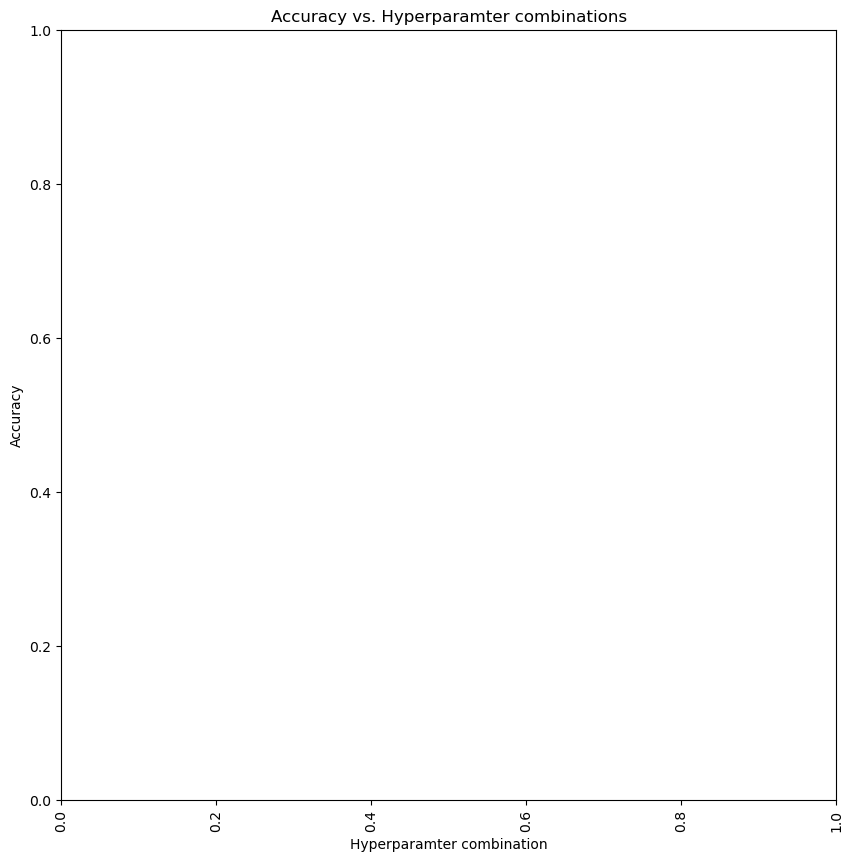

In [48]:
plt.figure(figsize = (10,10))
x_values = [str(params) for params in param_combinations]
plt.xticks(rotation=90)
plt.xlabel('Hyperparamter combination')
plt.ylabel ('Accuracy')
plt.title('Accuracy vs. Hyperparamter combinations')
plt.show()

In [49]:
#Displayy which model perform best on kyphosis dataset - Nnmodel or xgboost

In [50]:
model_names = ['XGBoost','Neural Network']
accuracy_scores = [xgb_accuracy, accuracy]


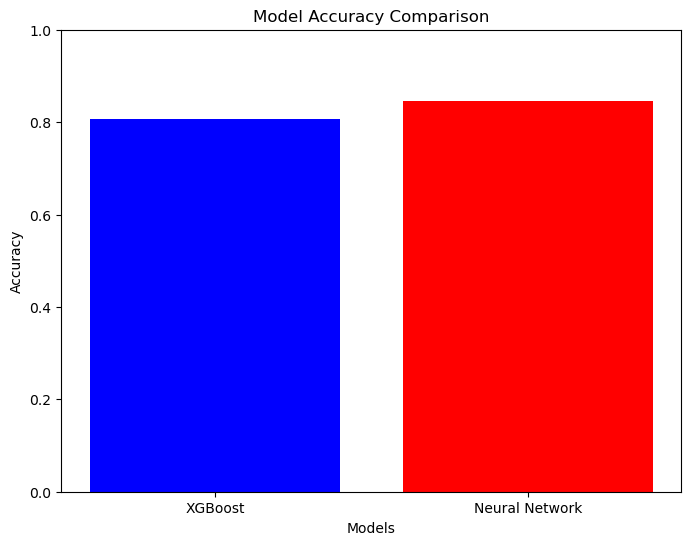

In [51]:
plt.figure(figsize = (8,6))
plt.bar(model_names, accuracy_scores, color = ['blue','red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0,1)  # set the y axis limits to the range [0,1] for accuracy
plt.show()